# Diffusion MRI - Tractography pipeline

To generate the fibre tracts of your brain, follow the step by step instructions below.  

### STEP 0

Move to a different folder and make a local copy of the input data there

In [ ]:
%mkdir -p dwi
%cd dwi

In [ ]:
%%bash
cp /nesi/project/uoa03979/data/dwi/dwi* ./

### STEP 1 

Extract the first diffusion image from the whole volume

In [ ]:
%%bash
fslroi dwi.nii nodif 0 1

### STEP 2 
Strip the skull and extract the brain

In [ ]:
%%bash
bet nodif nodif_brain -m

### STEP 3 
Convert dwi scan from nifti format to mif format

In [ ]:
%%bash
mrconvert -force dwi.nii.gz -fslgrad dwi.bvec dwi.bval dwi.mif
mrconvert -force nodif.nii.gz nodif.mif

### STEP 4 
Convert mask from nifti format to mif format

In [ ]:
%%bash
mrconvert -force nodif_brain_mask.nii.gz mask.mif

### STEP 5
Generate whole brain tractography

In [ ]:
%%bash
dwi2response dhollander -force dwi.mif wm.txt gm.txt csf.txt

In [ ]:
%%time
%%bash
srun --cpus-per-task 8 --mem 1GB --time 20 --account uoa03979 \
  dwi2fod -force msmt_csd dwi.mif wm.txt fod_wm.mif gm.txt gm.mif csf.txt csf.mif -mask mask.mif

In [ ]:
%%time
%%bash
srun --cpus-per-task 8 --mem 1GB --time 20 --account uoa03979 \
    tckgen fod_wm.mif Whole_brain_100K.tck \
        -force \
        -seed_image mask.mif \
        -mask mask.mif \
        -select 100k \
        -cutoff 0.15 \
        -info

### Switch to a Virtual Desktop session

Steps 6 and 7 requires you to open a Virtual Desktop session to run the commands:

- open a new Launcher panel from the `File` menu

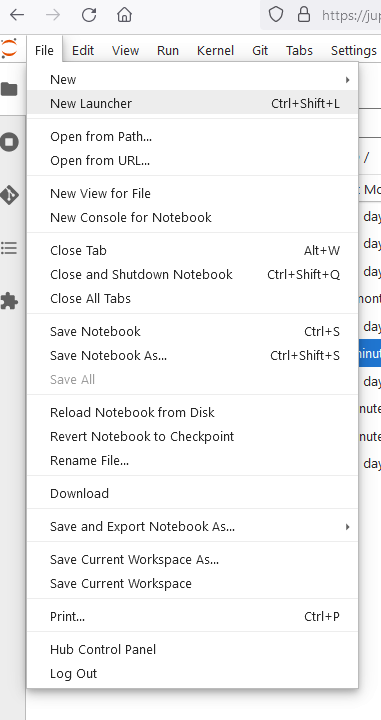

- then click on the icon `Virtual Desktop 2.4.3`, which will open a new tab in your web browser

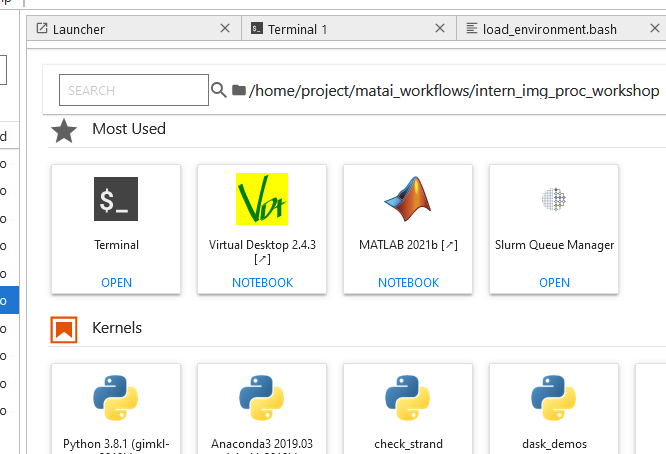

- in this new tab, finally, click on the terminal icon to open it

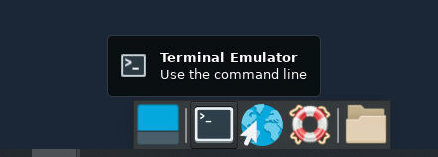

- and in the terminal, enter the following commands

```
source /nesi/project/uoa03979/intern_img_proc_workshop/load_environment.bash
cd /nesi/nobackup/uoa03979/$USER/dwi
```

If there are no errors, you are ready for the next steps.

### STEP 6

Visualise the Fibre orientation data

In the Virtual Desktop terminal, enter the following commands

```
mrview nodif.mif -odf.load_sh fod_wm.mif
```

### STEP 7

Visualise the whole brain fibre tracts

In the Virtual Desktop terminal, enter the following commands

```
mrview nodif.mif -tractography.load Whole_brain_100K.tck
```

### STEP 8 
Generate right Corticospintal tract 

In [ ]:
%%time
%%bash
srun --cpus-per-task 8 --mem 1GB --time 20 --account uoa03979 \
    tckgen fod_wm.mif CST_R.tck \
    -force \
    -seed_image dwi_CST_ROI_R.mif \
    -mask mask.mif \
    -select 10k \
    -cutoff 0.15 \
    -info

### STEP 9 
Generate left Corticospintal tract 

In [ ]:
%%time
%%bash
srun --cpus-per-task 8 --mem 1GB --time 20 --account uoa03979 \
    tckgen fod_wm.mif CST_L.tck \
    -force \
    -seed_image dwi_CST_ROI_L.mif \
    -mask mask.mif \
    -select 10k \
    -cutoff 0.15 \
    -info

### STEP 10 
Generate Corpus Callosum tract 

In [ ]:
%%time
%%bash
srun --cpus-per-task 8 --mem 1GB --time 20 --account uoa03979 \
    tckgen fod_wm.mif CC.tck \
    -force \
    -seed_image dwi_CC_ROI.mif \
    -mask mask.mif \
    -select 10k \
    -cutoff 0.15 \
    -info